In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('fifa21_raw_data_v2.csv')
data1=pd.read_csv('fifa21_raw_data.csv')

/var/folders/p7/t8mf_9w1121ch7f5wkpf02_r0000gn/T/ipykernel_66135/1729232310.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('fifa21_raw_data_v2.csv')
/var/folders/p7/t8mf_9w1121ch7f5wkpf02_r0000gn/T/ipykernel_66135/1729232310.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data1=pd.read_csv('fifa21_raw_data.csv')


In [3]:
data.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [5]:
data['Weight'].unique()


array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [6]:
data.Height.unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

# Changing to numerical format

In [7]:
# Changing Weight to numeric
mask = (data['Weight'].str.endswith('lbs'))
data['Weight'] = data['Weight'].str.strip('kglbs')
data['Weight'] = pd.to_numeric(data['Weight'], errors='coerce')
data_lbs = data[mask]
data.loc[mask, 'Weight'] = data_lbs['Weight'] * 0.45359237


In [8]:
data['Weight'] = data['Weight'].astype(int)
data['Weight'].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52])

In [9]:
def convert_height_cm(x):
    if 'cm' in x:
        return int(x.replace('cm', ''))
    else:
        height = x.split("'")
        return round(int(height[0])*30.48+int(height[1][:-1])*2.54)
data['Height'] = data['Height'].apply(convert_height_cm)

In [10]:
data.Height.dtypes

dtype('int64')

In [11]:
data.rename(columns = {'Height':'Height_cm', 'Weight':'Weight_kg'}, inplace = True)

# Separate Joined columns into Year , Month , day 

In [12]:
data.Joined

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974    Jul 13, 2018
18975     Aug 1, 2020
18976     Mar 8, 2019
18977    Sep 22, 2020
18978    Jul 29, 2019
Name: Joined, Length: 18979, dtype: object

In [13]:
data['Joined'] = pd.to_datetime(data.Joined)
data['Joined_Year'] = data.Joined.dt.year
data['Joined_month'] = data.Joined.dt.month
data['Joined_day'] = data.Joined.dt.day

# Clean and transform 'Value','Wage','Release Clause' into integers columns

In [14]:
data[['Value','Wage','Release Clause']].head()

,Value,Wage,Release Clause
0,€103.5M,€560K,€138.4M
1,€63M,€220K,€75.9M
2,€120M,€125K,€159.4M
3,€129M,€370K,€161M
4,€132M,€270K,€166.5M


In [15]:
convert=['Value','Wage','Release Clause']
#Create a function to formate the amount in the columns

def format_the_amount(x):
    x = x.replace('€', '')
    if 'M' in x:
        return int(float(x[:-1])*1000*1000)
    elif 'K' in x:
        return int(float(x[:-1])*1000)
    else:
        return round(float(x))
data.loc[:,convert] = data[convert].applymap(format_the_amount)

In [16]:
data[['Value','Wage','Release Clause']].head()

,Value,Wage,Release Clause
0,103500000,560000,138400000
1,63000000,220000,75900000
2,120000000,125000,159400000
3,129000000,370000,161000000
4,132000000,270000,166500000


# Remove newline character from Hits columns

In [17]:
data.Hits.unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [85]:
# Change 'Hits' type to int
data['Hits'] = data['Hits'].fillna(value="0")
mask = (data['Hits'].str.endswith('K'))
data_hits = data[mask]
data['Hits'] = data['Hits'].str.strip('K')
data.loc[mask, 'Hits'] = (data_hits['Hits'].str.extract(r"(\d*).(\d*)")
                   .apply(pd.to_numeric, errors='coerce')
                   .mul([1000, 100]).sum(axis=1).astype(int)
                  )

data['Hits'] = data['Hits'].astype(int)

In [18]:
data.Contract.unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [19]:
#Remove the unnecessary newline characters
data.replace('\n', '', regex=True, inplace=True)


# 2. Data exploring and answer guiding questions?

2.1 Which players are highly valuable but still underpaid (on low wages)?

In [20]:
data.describe()

,ID,Age,↓OVA,POT,Height_cm,Weight_kg,BOV,Value,Wage,Release Clause,...,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,Joined_Year,Joined_month,Joined_day
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,1.897900e+04,18979.000000,1.897900e+04,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,181.200221,75.018494,66.751726,2.865063e+06,9092.062279,3.962951e+06,...,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934,2018.288371,5.659466,10.191053
std,27141.054157,4.710520,6.968999,6.114635,6.840054,7.073402,6.747193,7.685154e+06,19707.021089,9.772762e+06,...,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883,2.085924,3.094688,9.979612
min,41.000000,16.000000,47.000000,47.000000,155.000000,50.000000,48.000000,0.000000e+00,0.000000,0.000000e+00,...,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000,1998.000000,1.000000,1.000000
25%,210135.000000,21.000000,61.000000,67.000000,176.000000,70.000000,62.000000,4.750000e+05,1000.000000,4.235000e+05,...,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000,2018.000000,2.000000,1.000000
50%,232418.000000,25.000000,66.000000,71.000000,181.000000,75.000000,67.000000,9.500000e+05,3000.000000,1.000000e+06,...,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000,2019.000000,7.000000,7.000000
75%,246922.500000,29.000000,70.000000,75.000000,186.000000,80.000000,71.000000,2.000000e+06,8000.000000,2.800000e+06,...,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000,2020.000000,8.000000,18.000000
max,259216.000000,53.000000,93.000000,95.000000,206.000000,110.000000,93.000000,1.855000e+08,560000.000000,2.031000e+08,...,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000,2020.000000,12.000000,31.000000


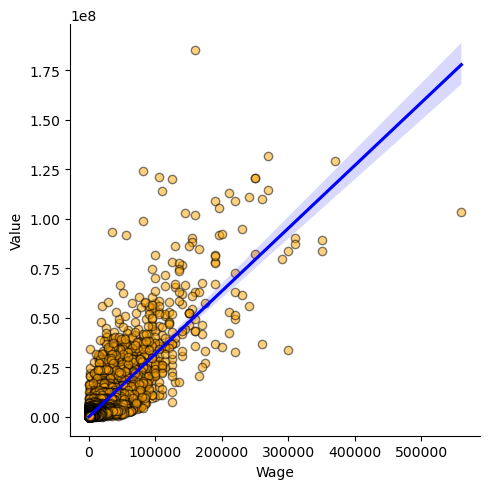

In [21]:
import seaborn as sns
sns.lmplot(
    data=data,
    x="Wage", y="Value",
    height=5,
    scatter_kws={'edgecolor' : 'black', 'linewidth' : 1, 'alpha':0.5, 'color' : 'orange'},
            line_kws = {'color':'blue'}
)

In [22]:
data.query('Wage < 200000 and Value >75000000').LongName

2                                Jan Oblak
7                    Alisson Ramses Becker
8                            Kylian Mbappé
19                            N'Golo Kanté
20                          Joshua Kimmich
21                            Paulo Dybala
22               Ederson Santana de Moraes
25                       Kalidou Koulibaly
29                            Jadon Sancho
30                  Trent Alexander-Arnold
32                        Andrew Robertson
34           Bruno Miguel Borges Fernandes
35                  Fábio Henrique Tavares
36                           Heung Min Son
37     Roberto Firmino Barbosa de Oliveira
47                           Ciro Immobile
52                          Marco Verratti
53                              Paul Pogba
65                             Kai Havertz
66                        Matthijs de Ligt
68                         Marcus Rashford
69                    Gianluigi Donnarumma
71                              Leroy Sané
80         

In [23]:
data.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Joined_Year,Joined_month,Joined_day
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,...,85,92,91,95,38,65,771,2004,7,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,...,89,93,81,89,35,77,562,2018,7,10
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,...,87,92,78,90,52,90,150,2014,7,16
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,...,76,86,93,88,64,78,207,2015,8,30
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,...,91,85,86,94,36,59,595,2017,8,3


2.2 : Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!

In [28]:
from datetime import datetime
current_year = datetime.now().year
# Calculate the duration in years
data['Years_at_Club'] = data.groupby(['Name','Club'])['Joined_Year'].transform(lambda x: current_year - x.min())

# Select rows where the duration is greater than or equal to 10 years
result = data[data['Years_at_Club'] >= 10][['Name', 'Joined_Year', 'Years_at_Club']].drop_duplicates()


In [29]:
result 

,Name,Joined_Year,Years_at_Club
0,L. Messi,2004,20
2,J. Oblak,2014,10
5,R. Lewandowski,2014,10
9,M. ter Stegen,2014,10
12,Casemiro,2013,11
...,...,...,...
18107,Cui Ming'an,2014,10
18251,G. Harkin,2014,10
18307,Song Zhiwei,2014,10
18390,J. Stevens,2014,10
